In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
print(train)

                id  label
0        blast (1)      1
1        blast (2)      1
2        blast (3)      1
3        blast (4)      1
4        blast (5)      1
5        blast (6)      1
6        blast (7)      1
7        blast (8)      1
8        blast (9)      1
9       blast (10)      1
10      blast (11)      1
11      blast (12)      1
12      blast (13)      1
13      blast (14)      1
14      blast (15)      1
15      blast (16)      1
16      blast (17)      1
17      blast (18)      1
18      blast (19)      1
19      blast (20)      1
20      blast (21)      1
21      blast (22)      1
22      blast (23)      1
23      blast (24)      1
24      blast (25)      1
25      blast (26)      1
26      blast (27)      1
27      blast (28)      1
28      blast (29)      1
29      blast (30)      1
...            ...    ...
3030  healthy(481)      6
3031  healthy(482)      6
3032  healthy(483)      6
3033  healthy(484)      6
3034  healthy(485)      6
3035  healthy(486)      6
3036  health

In [3]:
train.shape


(3060, 2)

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Dataset/Training/'+ train['id'][i] +'.jpg', grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
x = np.array(train_image)
print(x)

  0%|                                                                                         | 0/3060 [00:00<?, ?it/s]C:\Users\shweta\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|█████████████████████████████████████████████████████████████████████████████| 3060/3060 [00:07<00:00, 391.68it/s]


[[[[0.90588236]
   [0.90588236]
   [0.90588236]
   ...
   [0.8627451 ]
   [0.8627451 ]
   [0.8627451 ]]

  [[0.90588236]
   [0.90588236]
   [0.90588236]
   ...
   [0.8627451 ]
   [0.8627451 ]
   [0.85882354]]

  [[0.90588236]
   [0.90588236]
   [0.9098039 ]
   ...
   [0.8627451 ]
   [0.85882354]
   [0.85882354]]

  ...

  [[0.8745098 ]
   [0.8745098 ]
   [0.8745098 ]
   ...
   [0.8       ]
   [0.8       ]
   [0.8       ]]

  [[0.8745098 ]
   [0.8745098 ]
   [0.8745098 ]
   ...
   [0.8       ]
   [0.8       ]
   [0.8       ]]

  [[0.8745098 ]
   [0.8745098 ]
   [0.8745098 ]
   ...
   [0.8       ]
   [0.8       ]
   [0.8       ]]]


 [[[0.7921569 ]
   [0.79607844]
   [0.8       ]
   ...
   [0.5764706 ]
   [0.6       ]
   [0.627451  ]]

  [[0.7882353 ]
   [0.7921569 ]
   [0.79607844]
   ...
   [0.6       ]
   [0.6313726 ]
   [0.6627451 ]]

  [[0.78431374]
   [0.7882353 ]
   [0.7921569 ]
   ...
   [0.6313726 ]
   [0.6784314 ]
   [0.7058824 ]]

  ...

  [[0.8235294 ]
   [0.8235294 ]
   [0.8

In [5]:
x.shape

(3060, 256, 256, 1)

In [6]:
y = train['label'].values
y = to_categorical(y)

In [7]:
y.shape

(3060, 7)

In [8]:
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
print(y.shape)

(3060, 7)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

In [11]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=( 256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=10,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 2448 samples, validate on 612 samples
Epoch 1/30
2448/2448 - 687s - loss: 1.3718 - acc: 0.4473 - val_loss: 1.1317 - val_acc: 0.6797
Epoch 2/30
2448/2448 - 698s - loss: 0.9331 - acc: 0.6585 - val_loss: 0.8956 - val_acc: 0.7206
Epoch 3/30
2448/2448 - 875s - loss: 0.6600 - acc: 0.7672 - val_loss: 0.7222 - val_acc: 0.7827
Epoch 4/30
2448/2448 - 918s - loss: 0.5385 - acc: 0.8043 - val_loss: 0.5520 - val_acc: 0.8301
Epoch 5/30
2448/2448 - 917s - loss: 0.4307 - acc: 0.8509 - val_loss: 0.4480 - val_acc: 0.8775
Epoch 6/30
2448/2448 - 910s - loss: 0.3564 - acc: 0.8775 - val_loss: 0.4563 - val_acc: 0.8627
Epoch 7/30
2448/2448 - 732s - loss: 0.3268 - acc: 0.8795 - val_loss: 0.3597 - val_acc: 0.8938
Epoch 8/30
2448/2448 - 610s - loss: 0.2870 - acc: 0.8975 - val_loss: 0.3863 - val_acc: 0.8775
Epoch 9/30
2448/2448 - 613s - loss: 0.2567 - acc: 0.9118 - val_loss: 0.2862 - val_a

In [12]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [13]:
#save model
model.save("Final_Major_Acc93.h5")

In [17]:
expected_class = np.argmax(y_test,axis=1)
print(expected_classes)

[4 1 3 3 4 1 6 4 1 3 3 3 1 5 3 6 5 3 5 6 5 5 3 4 5 3 6 6 6 3 5 5 2 5 3 6 1
 1 3 1 3 6 1 3 5 2 5 4 1 6 5 3 6 2 1 2 1 5 2 4 4 1 4 1 6 1 2 4 3 1 3 5 4 1
 3 4 2 1 1 4 4 2 5 3 1 4 1 6 1 1 3 4 6 6 3 2 1 1 2 2 3 1 1 5 4 2 5 5 2 1 3
 2 1 6 6 4 6 4 3 6 4 4 3 1 4 1 2 5 1 1 5 1 1 1 3 6 6 6 3 1 4 4 4 1 6 4 6 3
 3 2 4 5 6 6 3 2 5 1 2 1 2 6 1 3 4 3 5 5 3 4 5 5 6 6 3 3 4 6 1 5 2 1 2 5 6
 6 6 2 5 6 2 4 2 5 3 4 5 2 5 1 1 4 6 1 2 6 6 4 2 6 1 6 3 3 5 3 6 3 5 3 6 2
 6 6 3 2 1 6 1 2 6 1 2 3 4 5 1 2 6 1 5 6 1 3 6 6 1 6 3 4 4 6 3 6 6 1 2 2 1
 2 1 3 1 2 6 4 3 6 1 2 4 4 1 5 2 1 5 6 3 5 3 4 6 6 4 6 6 6 2 6 1 6 5 5 4 2
 5 1 2 2 3 3 1 1 4 6 5 1 3 4 3 1 1 3 4 4 5 2 3 5 5 5 1 4 4 4 2 5 1 1 3 2 6
 2 5 2 5 1 6 4 3 1 1 4 4 3 2 2 4 6 1 6 4 6 1 6 1 1 3 1 5 2 3 5 3 3 4 4 4 2
 6 1 4 5 5 4 5 3 5 6 3 3 5 1 1 4 6 5 2 5 2 4 1 1 6 6 1 5 6 6 2 6 4 1 5 4 5
 3 2 3 5 6 2 3 4 2 3 6 4 5 3 2 6 2 2 5 6 3 1 4 1 3 5 1 5 2 3 2 1 3 4 4 5 3
 1 4 2 4 2 2 4 1 6 2 2 2 6 4 6 3 4 1 5 5 6 4 1 6 6 3 4 6 3 3 1 6 5 2 6 4 3
 1 6 1 4 2 5 2 5 3 3 2 2 

In [19]:
#Score 
from sklearn.metrics import accuracy_score
prediction = model.predict_classes(x_test)
correct = accuracy_score(expected_class,prediction)
correct

0.9330065359477124

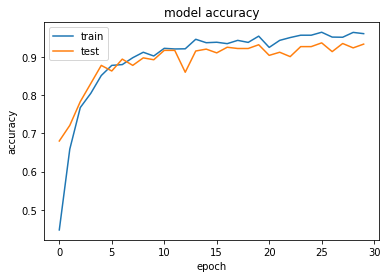

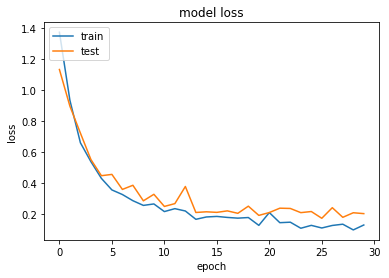

In [16]:
#Accuracy and Loss Plot
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuplot93.jpg')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('lossplot93.jpg')
plt.show()

In [18]:
# predict probabilities for test set
y_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
y_classes = model.predict_classes(x_test, verbose=0)
# reduce to 1d array
y_probs = y_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [21]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(expected_class, y_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.933007


In [22]:
# precision tp / (tp + fp)
precision = precision_score(expected_class, y_classes, average=None)
print(precision)

[0.95604396 0.77118644 0.95145631 1.         0.98979592 0.96330275]


In [23]:
# recall: tp / (tp + fn)
recall = recall_score(expected_class, y_classes, average=None)
print(recall)

[0.73728814 0.96808511 0.97029703 1.         1.         0.96330275]


In [24]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(expected_class, y_classes, average=None)
print(f1)

[0.83253589 0.85849057 0.96078431 1.         0.99487179 0.96330275]


In [27]:
# confusion matrix
matrix1 = confusion_matrix(expected_class, y_classes)
print(matrix1)

[[ 87  25   2   0   0   4]
 [  1  91   2   0   0   0]
 [  0   2  98   0   1   0]
 [  0   0   0  93   0   0]
 [  0   0   0   0  97   0]
 [  3   0   1   0   0 105]]


In [28]:
from sklearn.metrics import classification_report
target_names = ['Leaf Smut', 'Bacterial Blight', 'Brown Spot', 'Sheath Blight', 'Tungro', 'Healthy']
print(classification_report(expected_class, y_classes, target_names=target_names))

                  precision    recall  f1-score   support

       Leaf Smut       0.96      0.74      0.83       118
Bacterial Blight       0.77      0.97      0.86        94
      Brown Spot       0.95      0.97      0.96       101
   Sheath Blight       1.00      1.00      1.00        93
          Tungro       0.99      1.00      0.99        97
         Healthy       0.96      0.96      0.96       109

        accuracy                           0.93       612
       macro avg       0.94      0.94      0.93       612
    weighted avg       0.94      0.93      0.93       612



In [45]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix \n',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, origin='lower')
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

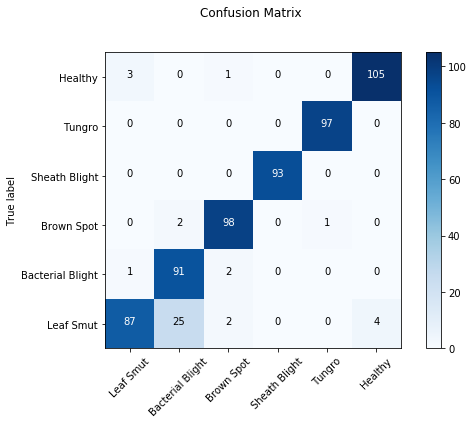

In [147]:

plt1=plot_confusion_matrix(cm           = matrix1, 
                      normalize    = False,
                      target_names = target_names,
                      title        = "Confusion Matrix \n\n")


In [62]:
test = pd.read_csv(r'C:\Users\shweta\Desktop\deep\Major1.0\test2 .csv')
print(test)


              id  label
0      blast (1)      1
1      blast (2)      1
2      blast (3)      1
3      blast (4)      1
4      blast (5)      1
5      blast (6)      1
6      blast (7)      1
7      blast (8)      1
8      blast (9)      1
9     blast (10)      1
10    blast (11)      1
11    blast (12)      1
12    blast (13)      1
13    blast (14)      1
14    blast (15)      1
15    blast (16)      1
16    blast (17)      1
17    blast (18)      1
18    blast (19)      1
19    blast (20)      1
20    blast (21)      1
21    blast (22)      1
22    blast (23)      1
23    blast (24)      1
24    blast (25)      1
25    blast (26)      1
26    blast (27)      1
27    blast (28)      1
28    blast (29)      1
29    blast (30)      1
..           ...    ...
270  healthy(21)      6
271  healthy(22)      6
272  healthy(23)      6
273  healthy(24)      6
274  healthy(25)      6
275  healthy(26)      6
276  healthy(27)      6
277  healthy(28)      6
278  healthy(29)      6
279  healthy(30)

In [63]:
test.shape

(300, 2)

In [65]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('Dataset/Testing/'+ test['id'][i] +'.jpg', grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test2 = np.array(test_image)

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 361.47it/s]


In [66]:
print(test2.shape)
y=test['label'].values
y = to_categorical(y)

(300, 256, 256, 1)


In [67]:
expected_classes = np.argmax(y,axis=1)
print(expected_classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6]


In [68]:
prediction = model.predict_classes(test2)
print(prediction)

[1 2 3 1 1 3 2 1 2 1 1 1 2 2 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 2 2
 2 1 1 2 1 1 2 1 2 1 2 2 2 2 2 2 2 3 2 2 3 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6
 6 6 6 6]


In [37]:
# predict probabilities for test set
yhat_probs = model.predict(test1, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(test1, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

In [125]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [38]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(expected_classes, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.906667


In [39]:
# precision tp / (tp + fp)
precision = precision_score(expected_classes, yhat_classes, average=None)
print(precision)

[0.96551724 0.68656716 0.90740741 0.98039216 1.         1.        ]


In [41]:
# recall: tp / (tp + fn)
recall = recall_score(expected_classes, yhat_classes, average=None)
print(recall)

[0.56 0.92 0.98 1.   1.   0.98]


In [42]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(expected_classes, yhat_classes, average=None)
print(f1)

[0.70886076 0.78632479 0.94230769 0.99009901 1.         0.98989899]


In [43]:
# confusion matrix
matrix = confusion_matrix(expected_classes, yhat_classes)
print(matrix)

[[28 20  2  0  0  0]
 [ 0 46  3  1  0  0]
 [ 0  1 49  0  0  0]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0 50  0]
 [ 1  0  0  0  0 49]]


In [44]:
from sklearn.metrics import classification_report
target_names = ['Leaf Smut', 'Bacterial Blight', 'Brown Spot', 'Sheath Blight', 'Tungro', 'Healthy']
print(classification_report(expected_classes, yhat_classes, target_names=target_names))

                  precision    recall  f1-score   support

       Leaf Smut       0.97      0.56      0.71        50
Bacterial Blight       0.69      0.92      0.79        50
      Brown Spot       0.91      0.98      0.94        50
   Sheath Blight       0.98      1.00      0.99        50
          Tungro       1.00      1.00      1.00        50
         Healthy       1.00      0.98      0.99        50

        accuracy                           0.91       300
       macro avg       0.92      0.91      0.90       300
    weighted avg       0.92      0.91      0.90       300



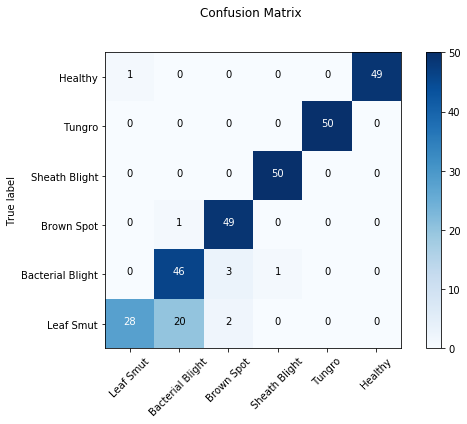

In [46]:
plot_confusion_matrix(cm           = matrix, 
                      normalize    = False,
                      target_names = target_names,
                      title        = "Confusion Matrix \n\n")

In [137]:
#for checking the model prediction
from keras.preprocessing import image
import numpy as np
import cv2
test_image1 = []
for i in range(1,51):
    
    img = image.load_img(r"C:\Users\shweta\Desktop\deep\Major1.0\Dataset\Testing\healthy("+str(i)+").jpg", grayscale=True)
    img = image.img_to_array(img)
    test_image1.append(img)
test1 = np.array(test_image1)
#print(test1.shape)
#prediction = model.predict_classes(test1)

In [138]:
import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('Final_Major_Acc93.h5')
new_predictions = classifierLoad.predict_classes(test1 )
print(new_predictions)

[6 1 1 6 6 6 6 1 1 6 1 6 1 1 1 6 1 1 6 6 1 1 1 6 1 6 6 1 1 6 6 6 1 1 1 1 1
 1 1 6 6 1 3 6 6 6 6 1 1 1]


In [140]:

import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('Final_Major_Acc84.h5')
new_predictions1 = classifierLoad.predict_classes(test1 )
print(new_predictions1)

[6 3 6 6 6 6 6 3 6 6 6 6 6 6 6 6 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [141]:
import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('Major2_Acc86.h5')
new_predictions = classifierLoad.predict_classes(test1 )
print(new_predictions)

[6 3 6 6 6 6 4 3 6 6 3 6 6 3 6 6 6 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6
 6 6 6 6 6 6 6 6 3 6 6 6 6]
